In [1]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

path='gdrive/MyDrive/evaluation InContextLearning2024'

import sys
sys.path.append('/content/'+path)


Mounted at /content/gdrive


In [2]:
%cd 'evaluation InContextLearning2024'

[Errno 2] No such file or directory: 'evaluation InContextLearning2024'
/content


In [9]:
! ls

environment.yaml  src


In [1]:
from eval.eval import basic_eval
from models.linear import LeastSquaresModel
from models.zero_model import ZeroModel
from function_classes.linear import LinearRegression

from torch.distributions.normal import Normal
import torch

from torch import nn


from torch import normal

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "samples": 10}

evaluation=basic_eval(LeastSquaresModel(), config_data)

print(basic_eval(ZeroModel(), config_data))

{'accuracy': tensor([ 633.4113, 1235.6324, 1023.2640, 1082.3071, 1176.5699, 1239.5116,
         935.0817,  892.2277,  867.3441,  795.4309, 1277.1619, 1323.5231,
        1434.5225,  609.4480,  851.2531, 1008.9870, 1743.8588, 1056.0555,
         848.5148, 1154.0413, 1193.6962,  694.8664, 1140.0095, 1361.2532,
         820.2142,  962.1483,  977.6629,  885.3844, 1227.2542, 1122.3290,
         964.1545, 1071.1599, 1308.5663, 1065.4735,  952.1263,  948.6199,
        1456.5414,  927.6597,  790.6127, 1294.1622, 1167.0433,  937.7080,
         985.8919,  746.0309,  710.9044,  975.4707, 1329.2615, 1043.7378,
        1342.4244, 1032.2727, 1162.8427, 1011.6291,  837.9072,  803.4146,
        1209.2102,  858.1875, 1339.2705,  873.3381,  991.3716,  576.2695,
         903.1532,  910.9437, 1261.9705,  996.5302,  967.7845, 1068.0830,
         802.9957, 1202.0603,  940.8137,  935.6302, 1408.7894,  887.3942,
         762.5648,  976.6576, 1008.3771, 1042.2053, 1270.3962,  695.7726,
         616.3615, 1067.4

dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'quantile0.01', 'quantile0.05', 'quantile0.1', 'quantile0.25', 'quantile0.5', 'quantile0.75', 'quantile0.9', 'quantile0.95', 'quantile0.99'])


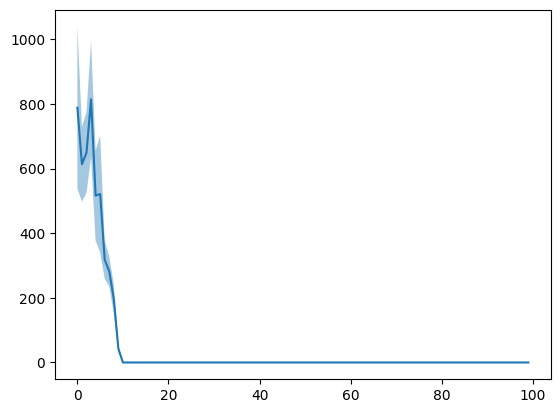

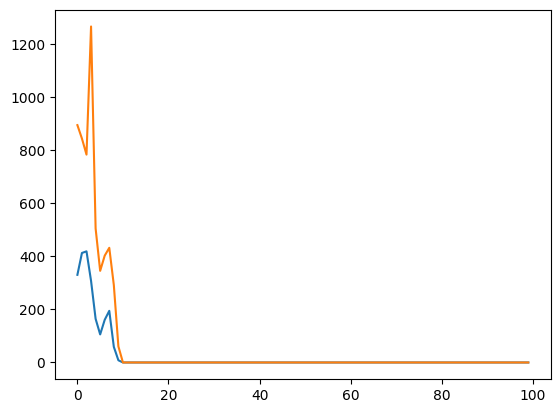

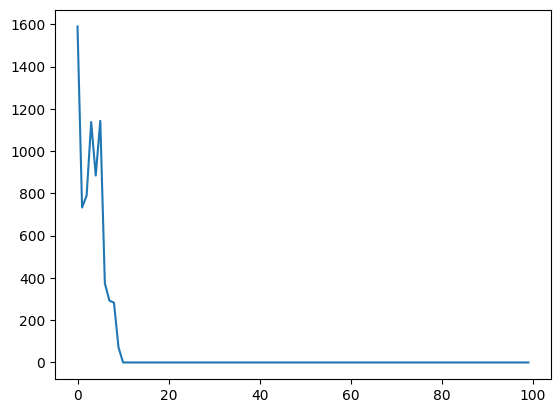

In [5]:
import matplotlib.pyplot as plt

import numpy as np

print(evaluation.keys())

plt.plot(evaluation.get("accuracy"))

plt.fill_between(range(len(evaluation.get("accuracy"))), evaluation.get("accuracy")-evaluation.get("std_mean"), evaluation.get("accuracy")+evaluation.get("std_mean"), alpha=0.4)

plt.show()

plt.plot(evaluation.get("quantile0.5") )

plt.plot(evaluation.get("quantile0.75"))

plt.show()

plt.plot(evaluation.get("std"))